In [1]:
import pandas as pd
import joblib
from datetime import datetime

In [2]:
model = joblib.load("C:/HoGent/Jaar2/ML/Project/MachineLearningProject_Solar/script/best_model.joblib")


In [3]:
forecast_df = pd.read_csv(r"C:/HoGent/Jaar2/ML/Project/MachineLearningProject_Solar\data/forecast(in).csv")
sunset_df = pd.read_csv(r"C:/HoGent/Jaar2/ML/Project/MachineLearningProject_Solar/data/sunrise-sunset.csv")


In [4]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          48 non-null     object 
 1   temp               48 non-null     float64
 2   pressure           48 non-null     int64  
 3   cloudiness         48 non-null     float64
 4   humidity_relative  48 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


In [5]:
sunset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   datum           731 non-null    object
 1   Opkomst         731 non-null    object
 2   Op ware middag  731 non-null    object
 3   Ondergang       731 non-null    object
dtypes: object(4)
memory usage: 23.0+ KB


In [6]:
# day of the year
forecast_df['timestamp'] = pd.to_datetime(forecast_df['timestamp'])
forecast_df['day_of_year'] = forecast_df['timestamp'].dt.dayofyear

# sunrise and sunset
sunset_df['datum'] = pd.to_datetime(sunset_df['datum'])
sunset_df['day_of_year'] = sunset_df['datum'].dt.dayofyear


In [7]:
forecast_df.head()

,timestamp,temp,pressure,cloudiness,humidity_relative,day_of_year
0,2024-05-20 22:00:00,13.45,1004,6.48,91,141
1,2024-05-20 23:00:00,13.59,1003,6.72,90,141
2,2024-05-21 00:00:00,13.53,1004,6.80,90,142
3,2024-05-21 01:00:00,12.97,1005,6.64,92,142
4,2024-05-21 02:00:00,12.25,1007,6.48,93,142


In [8]:
sunset_df.head()

,datum,Opkomst,Op ware middag,Ondergang,day_of_year
0,2023-01-01,08:45:00,12:46:00,16:47:00,1
1,2023-01-02,08:45:00,12:46:00,16:48:00,2
2,2023-01-03,08:45:00,12:47:00,16:49:00,3
3,2023-01-04,08:44:00,12:47:00,16:51:00,4
4,2023-01-05,08:44:00,12:48:00,16:52:00,5


In [9]:
# merge the two dataframes
merged_forecast_df = pd.merge(forecast_df, sunset_df, on='day_of_year', how='left')

In [10]:
merged_forecast_df.head()

,timestamp,temp,pressure,cloudiness,humidity_relative,day_of_year,datum,Opkomst,Op ware middag,Ondergang
0,2024-05-20 22:00:00,13.45,1004,6.48,91,141,2023-05-21,05:46:00,13:39:00,21:33:00
1,2024-05-20 22:00:00,13.45,1004,6.48,91,141,2024-05-20,05:46:00,13:39:00,21:33:00
2,2024-05-20 23:00:00,13.59,1003,6.72,90,141,2023-05-21,05:46:00,13:39:00,21:33:00
3,2024-05-20 23:00:00,13.59,1003,6.72,90,141,2024-05-20,05:46:00,13:39:00,21:33:00
4,2024-05-21 00:00:00,13.53,1004,6.80,90,142,2023-05-22,05:45:00,13:39:00,21:34:00


In [11]:
merged_forecast_df.drop_duplicates(subset=['timestamp'], inplace=True)

In [12]:
merged_forecast_df['hour'] = merged_forecast_df['timestamp'].dt.hour

In [13]:
""" 
merged_forecast_df["Opkomst"] = pd.to_datetime(merged_forecast_df["Opkomst"], utc=True)
merged_forecast_df["Op ware middag"] = pd.to_datetime(merged_forecast_df["Op ware middag"], utc=True)
merged_forecast_df["Ondergang"] = pd.to_datetime(merged_forecast_df["Ondergang"], utc=True) """

' \nmerged_forecast_df["Opkomst"] = pd.to_datetime(merged_forecast_df["Opkomst"], utc=True)\nmerged_forecast_df["Op ware middag"] = pd.to_datetime(merged_forecast_df["Op ware middag"], utc=True)\nmerged_forecast_df["Ondergang"] = pd.to_datetime(merged_forecast_df["Ondergang"], utc=True) '

In [14]:
merged_forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 94
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          48 non-null     datetime64[ns]
 1   temp               48 non-null     float64       
 2   pressure           48 non-null     int64         
 3   cloudiness         48 non-null     float64       
 4   humidity_relative  48 non-null     int64         
 5   day_of_year        48 non-null     int64         
 6   datum              48 non-null     datetime64[ns]
 7   Opkomst            48 non-null     object        
 8   Op ware middag     48 non-null     object        
 9   Ondergang          48 non-null     object        
 10  hour               48 non-null     int64         
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)
memory usage: 4.5+ KB


In [15]:
# convert to floats (Ondergang, Opkomst, Op ware middag)
merged_forecast_df['Ondergang'] = merged_forecast_df['Ondergang'].astype(str).str.replace(':', '').astype(float)
merged_forecast_df['Opkomst'] = merged_forecast_df['Opkomst'].astype(str).str.replace(':','').astype(float)
merged_forecast_df['Op ware middag'] = merged_forecast_df['Op ware middag'].astype(str).str.replace(':','').astype(float)

In [16]:
merged_forecast_df.head()

,timestamp,temp,pressure,cloudiness,humidity_relative,day_of_year,datum,Opkomst,Op ware middag,Ondergang,hour
0,2024-05-20 22:00:00,13.45,1004,6.48,91,141,2023-05-21,54600.0,133900.0,213300.0,22
2,2024-05-20 23:00:00,13.59,1003,6.72,90,141,2023-05-21,54600.0,133900.0,213300.0,23
4,2024-05-21 00:00:00,13.53,1004,6.80,90,142,2023-05-22,54500.0,133900.0,213400.0,0
6,2024-05-21 01:00:00,12.97,1005,6.64,92,142,2023-05-22,54500.0,133900.0,213400.0,1
8,2024-05-21 02:00:00,12.25,1007,6.48,93,142,2023-05-22,54500.0,133900.0,213400.0,2


In [17]:
# drop columns
merged_forecast_df = merged_forecast_df.drop(columns=['timestamp', 'datum'])

In [18]:
merged_forecast_df = merged_forecast_df[['temp', 'humidity_relative', 'pressure', 'cloudiness', 'Opkomst', 'Op ware middag', 'Ondergang', 'hour', 'day_of_year']]

In [19]:
# run model on forecast data
predictions = model.predict(merged_forecast_df)
# save predictions
output_df = pd.DataFrame({'prediction': predictions})

# print forecast for variable hour : prediction
print(output_df)



    prediction
0     0.000223
1     0.000293
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.004893
9     0.027137
10    0.058772
11    0.011421
12    0.194282
13    0.388870
14    0.507250
15    0.658200
16    0.577882
17    0.261133
18    0.214705
19    0.157954
20    0.114298
21    0.092880
22    0.017767
23    0.001627
24    0.000102
25    0.000102
26    0.000000
27    0.000000
28    0.000000
29    0.000000
30    0.000000
31    0.000000
32    0.004893
33    0.027137
34    0.060416
35    0.011421
36    0.193592
37    0.251375
38    0.236218
39    0.427123
40    0.645608
41    0.592793
42    0.505111
43    0.436371
44    0.250620
45    0.114277
46    0.020149
47    0.005664


In [31]:
uur = merged_forecast_df['hour']


for hour, prediction in zip(uur, predictions):
    rounded_prediction = round(prediction, 4)
    print(f"voor uur {hour} is de voorspelling: {rounded_prediction}")


voor uur 22 is de voorspelling: 0.0002
voor uur 23 is de voorspelling: 0.0003
voor uur 0 is de voorspelling: 0.0
voor uur 1 is de voorspelling: 0.0
voor uur 2 is de voorspelling: 0.0
voor uur 3 is de voorspelling: 0.0
voor uur 4 is de voorspelling: 0.0
voor uur 5 is de voorspelling: 0.0
voor uur 6 is de voorspelling: 0.0049
voor uur 7 is de voorspelling: 0.0271
voor uur 8 is de voorspelling: 0.0588
voor uur 9 is de voorspelling: 0.0114
voor uur 10 is de voorspelling: 0.1943
voor uur 11 is de voorspelling: 0.3889
voor uur 12 is de voorspelling: 0.5072
voor uur 13 is de voorspelling: 0.6582
voor uur 14 is de voorspelling: 0.5779
voor uur 15 is de voorspelling: 0.2611
voor uur 16 is de voorspelling: 0.2147
voor uur 17 is de voorspelling: 0.158
voor uur 18 is de voorspelling: 0.1143
voor uur 19 is de voorspelling: 0.0929
voor uur 20 is de voorspelling: 0.0178
voor uur 21 is de voorspelling: 0.0016
voor uur 22 is de voorspelling: 0.0001
voor uur 23 is de voorspelling: 0.0001
voor uur 0 is d

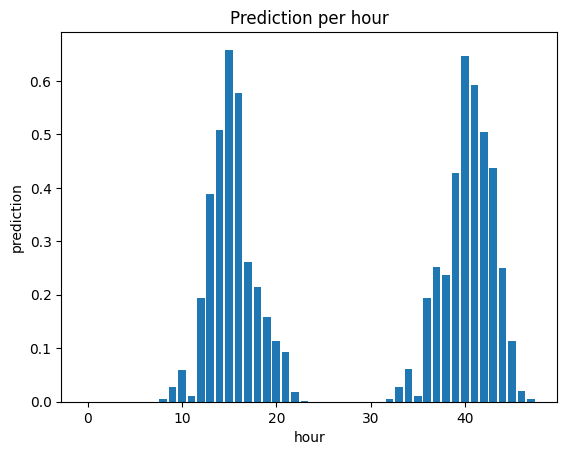

In [32]:
# bar chart
import matplotlib.pyplot as plt
import numpy as np
hours = merged_forecast_df["hour"]


hours = np.arange(0, 48, 1)
plt.bar(hours, predictions)
plt.xlabel('hour')
plt.ylabel('prediction')
plt.title('Prediction per hour')
plt.show()
